In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EXTRACTING IMAGES FROM THE PROVIDED ZIPFILE**

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/OralVis/ToothNumber_TaskDataset.zip"
extract_to = "/content/drive/MyDrive/OralVis"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


SPLITTING THE DATA USING SKLEARN TRAIN TEST SPLIT AND ADDING ABSOLUTE PATHS OF IMAGES


In [ ]:
from sklearn.model_selection import train_test_split
import os, shutil

images_dir = "/content/drive/MyDrive/OralVis/images"
labels_dir = "/content/drive/MyDrive/OralVis/labels"
output_dir = "/content/drive/MyDrive/OralVis/dataset_split"

images = sorted(os.listdir(images_dir))
labels = sorted(os.listdir(labels_dir))

pairs = [(img, img.rsplit('.', 1)[0] + ".txt") for img in images if img.rsplit('.', 1)[0] + ".txt" in labels]
train, temp = train_test_split(pairs, test_size=0.2, random_state=42)

val, test = train_test_split(temp, test_size=0.5, random_state=42)

splits = {"train": train, "val": val, "test": test}

for split, files in splits.items():
    img_out = os.path.join(output_dir, split, "images")
    lbl_out = os.path.join(output_dir, split, "labels")
    os.makedirs(img_out, exist_ok=True)
    os.makedirs(lbl_out, exist_ok=True)
    txt_file = os.path.join(output_dir, f"{split}.txt")
    with open(txt_file, "w") as f:
        for img, lbl in files:
            shutil.copy(os.path.join(images_dir, img), img_out)
            shutil.copy(os.path.join(labels_dir, lbl), lbl_out)
            abs_img_path = os.path.abspath(os.path.join(img_out, img))
            f.write(abs_img_path + "\n")


In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!yolo detect train data=/content/drive/MyDrive/OralVis/dataset_split/data.yaml \
    model=yolov8s.pt epochs=100 imgsz=640 batch=16


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/OralVis/dataset_split/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

results = model.val(data="/content/drive/MyDrive/OralVis/dataset_split/data.yaml", split="test")


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,968 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 106.0±235.7 ms, read: 0.1±0.1 MB/s, size: 110.4 KB)
val: Scanning /content/drive/MyDrive/OralVis/dataset_split/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 0.63it/s 1:20
val: New cache created: /content/drive/MyDrive/OralVis/dataset_split/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.1it/s 3.8s
                   all         50       1457      0.909      0.896      0.944      0.658
           Canine (13)         49         49      0.925      0.898      0.961      0.623
           Canine (23)         47         47      0.933      0.891      0.927      0.625
           Canine (33)         50         50      0.907       0.92       0.92      0.653
           Canine (43)         50 

In [ ]:
# !zip -r results.zip runs
# from google.colab import files
# files.download("results.zip")

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
  adding: runs/detect/train/labels.jpg (deflated 48%)
  adding: runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: runs/detect/train/val_batch0_pred.jpg (deflated 6%)
  adding: runs/detect/train/BoxR_curve.png (deflated 11%)
  adding: runs/detect/train/train_batch2252.jpg (deflated 6%)
  adding: runs/detect/train/confusion_matrix_normalized.png (deflated 21%)
  adding: runs/detect/train/results.csv (deflated 62%)
  adding: runs/detect/train/confusion_matrix.png (deflated 20%)
  adding: runs/detect/train/BoxP_curve.png (deflated 11%)
  adding: runs/detect/train/BoxPR_curve.png (deflated 13%)
  adding: runs/detect/train/train_batch2.jpg (deflated 1%)
  adding: runs/detect/train/BoxF1_curve.png (deflated 11%)
  addin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

def post_process_teeth(detections, img_width, img_height):

    teeth = []
    for det in detections:
        x, y, w, h, conf, cls = det
        x *= img_width
        y *= img_height
        w *= img_width
        h *= img_height
        teeth.append({"x": x, "y": y, "conf": conf, "bbox": [x, y, w, h]})

    ys = np.array([t["y"] for t in teeth])
    y_mid = np.median(ys)
    upper = [t for t in teeth if t["y"] < y_mid]
    lower = [t for t in teeth if t["y"] >= y_mid]


    x_mid = img_width / 2
    quadrants = {
        1: [t for t in upper if t["x"] >= x_mid],
        2: [t for t in upper if t["x"] < x_mid],
        3: [t for t in lower if t["x"] < x_mid],
        4: [t for t in lower if t["x"] >= x_mid],
    }

    results = []

    for q, teeth_list in quadrants.items():
        if q in [1, 2]:
            teeth_sorted = sorted(teeth_list, key=lambda t: t["x"])
            teeth_sorted = sorted(teeth_list, key=lambda t: t["x"], reverse=True)

        if len(teeth_sorted) > 1:
            dists = [teeth_sorted[i+1]["x"] - teeth_sorted[i]["x"] for i in range(len(teeth_sorted)-1)]
            avg_spacing = np.mean(dists) if dists else 0
        else:
            avg_spacing = 0

        tooth_num = 1
        for i, t in enumerate(teeth_sorted):
            if i > 0 and avg_spacing > 0:
                gap = teeth_sorted[i]["x"] - teeth_sorted[i-1]["x"]
                if gap > 1.5 * avg_spacing:
                    tooth_num += 1

            fdi_id = q * 10 + tooth_num
            results.append({
                "fdi_id": fdi_id,
                "bbox": t["bbox"],
                "conf": t["conf"]
            })

            tooth_num += 1

    return results


In [ ]:
import cv2
import matplotlib.pyplot as plt

def visualize_fdi(image_path, processed_results, save_path=None):

    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"image not found: {image_path}")

    for r in processed_results:
        x, y, w, h = map(int, r["bbox"])
        fdi_id = r["fdi_id"]
        x1, y1 = int(x - w/2), int(y - h/2)
        x2, y2 = int(x + w/2), int(y + h/2)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        cv2.putText(img, str(fdi_id), (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    if save_path:
        cv2.imwrite(save_path, img)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()



image 1/1 /content/drive/MyDrive/OralVis/dataset_split/val/images/18fd6ab8-20250415-143542497.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 2 Central Incisor (41)s, 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 2 Lateral Incisor (42)s, 1 Lateral Incisor (12), 2 Second Molar (17)s, 1 Second Molar (27), 1 Second Molar (37), 1 Second Molar (47), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (18), 1 Third Molar (28), 1 Third Molar (38), 1 Third Molar (48), 16.3ms
Speed: 4.4ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
✅ Saved annotated image to annotated_fdi.jpg


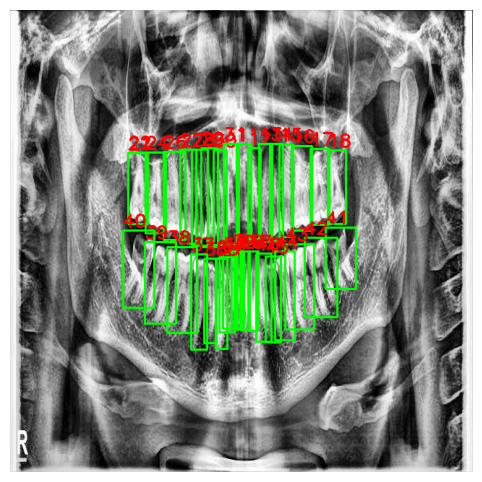

In [ ]:
model = YOLO("/content/drive/MyDrive/OralVis/runs/detect/train/weights/best.pt")
image_path = "/content/drive/MyDrive/OralVis/dataset_split/val/images/18fd6ab8-20250415-143542497.jpg"
results = model(image_path)[0]
detections = []
for box in results.boxes:
    x_center, y_center, w, h = box.xywhn[0].tolist()
    conf = float(box.conf)
    cls = int(box.cls)
    detections.append([x_center, y_center, w, h, conf, cls])

processed = post_process_teeth(detections,
                               img_width=results.orig_shape[1],
                               img_height=results.orig_shape[0])
visualize_fdi(image_path, processed, save_path="annotated_fdi.jpg")

In [2]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/OralVis/runs/detect/train/weights/best.pt")
results = model.val(data="/content/drive/MyDrive/OralVis/dataset_split/data.yaml")
print(results)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,968 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 38.5±85.0 ms, read: 0.6±0.4 MB/s, size: 113.1 KB)
val: Scanning /content/drive/MyDrive/OralVis/dataset_split/val/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 15703.1it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.26it/s 15.5s
                   all         50       1336      0.885      0.892      0.916      0.621
           Canine (13)         45         45       0.91      0.867   